In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn

# Data Reading

In [2]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [4]:
train.shape

(43400, 12)

In [5]:
test.shape

(18601, 11)

# Data Cleaning


**Identifing missing attributes**

In [6]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [7]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

<AxesSubplot:>

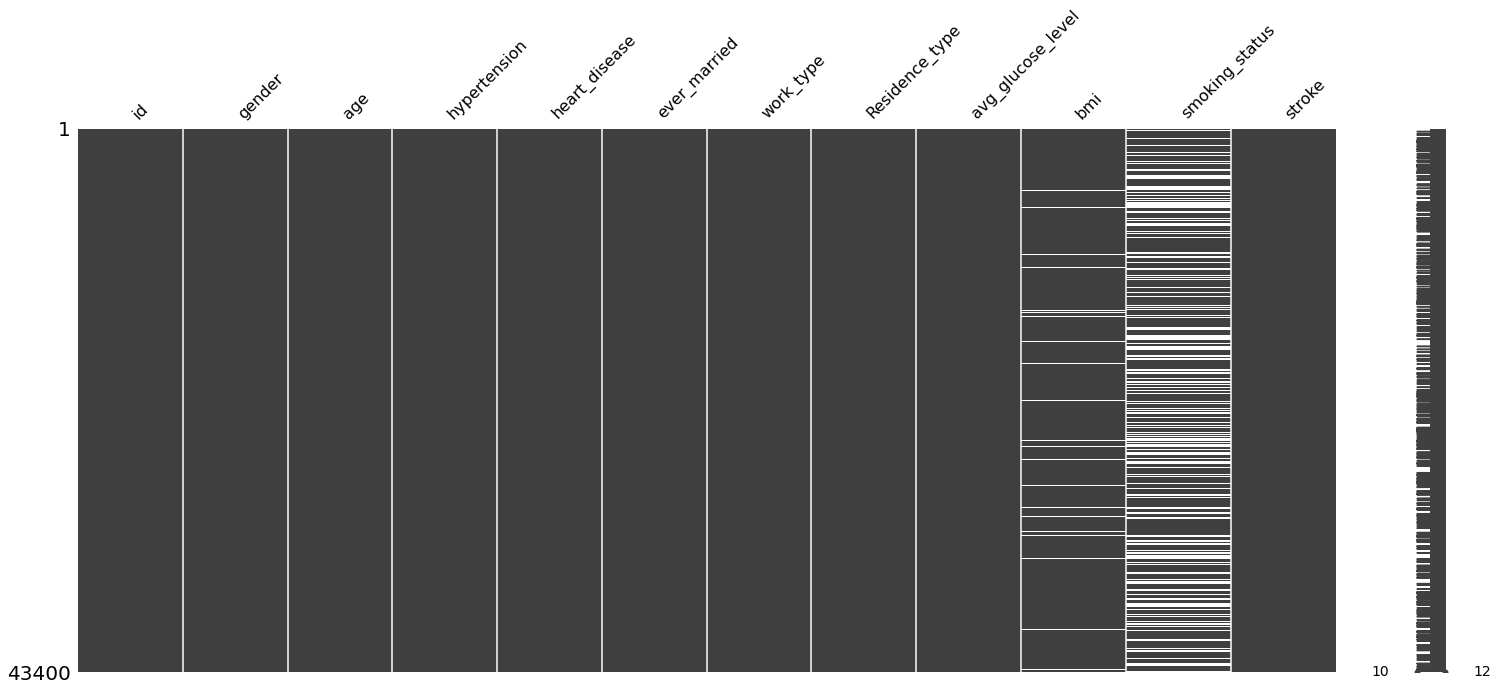

In [8]:
ms.matrix(train)

**Removing missing values**

In [9]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (29072, 12)
test data shape: (12423, 11)


<AxesSubplot:>

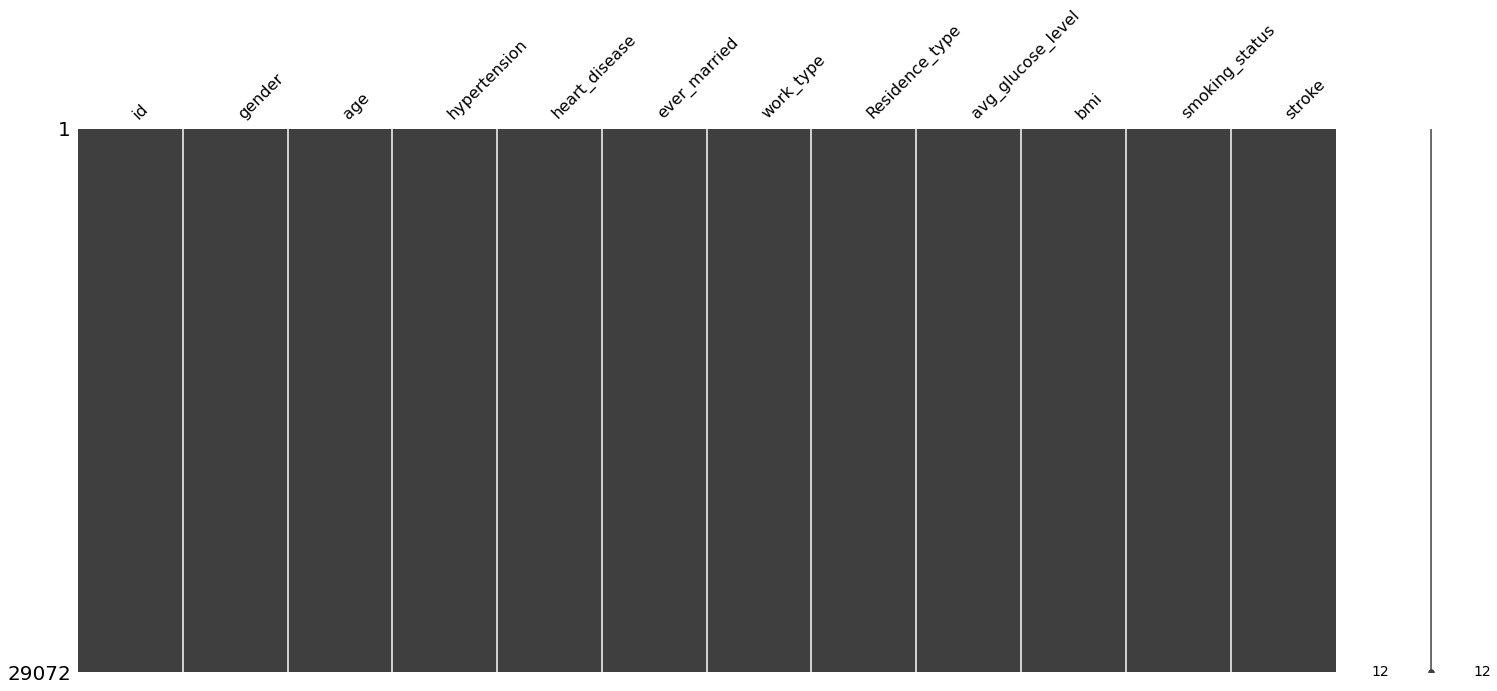

In [10]:
ms.matrix(train_data)

<AxesSubplot:>

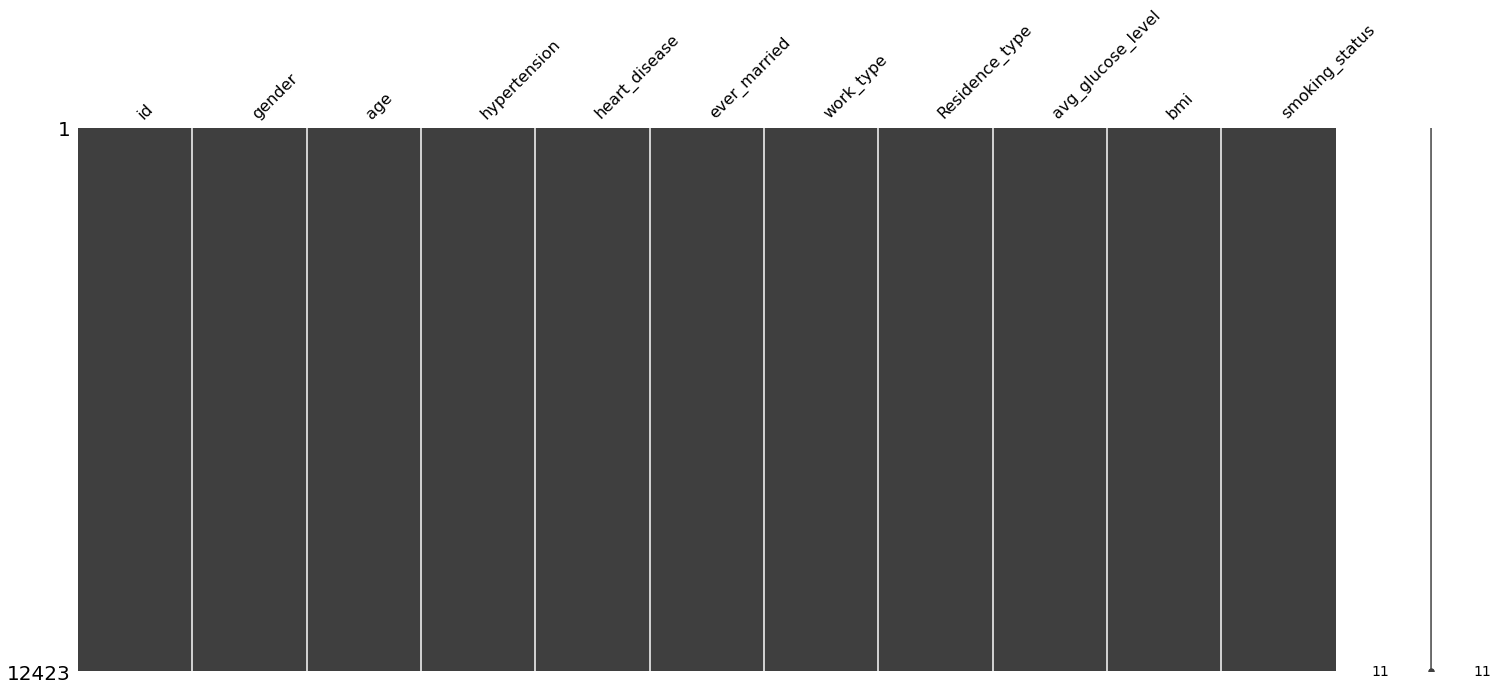

In [11]:
ms.matrix(test_data)

# Pattern Recognition

In [12]:
train_data["stroke"].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

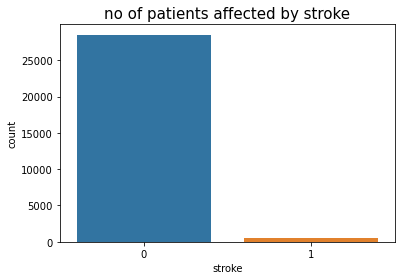

In [13]:
sns.countplot(x=train_data["stroke"])
plt.title("no of patients affected by stroke", fontsize=15)
plt.show()

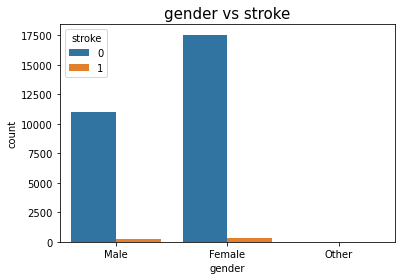

In [14]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

In [15]:
train_data.groupby(["gender"])["stroke"].value_counts()


gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [16]:
train_data["smoking_status"].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [17]:
train_data.groupby(["gender"])["smoking_status"].value_counts()


gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

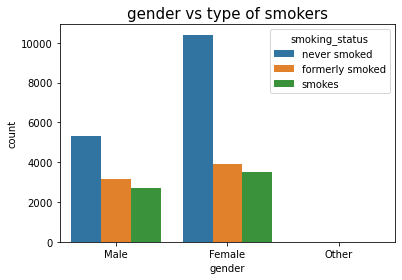

In [18]:
sns.countplot(x=train_data["gender"], hue=train_data["smoking_status"])
plt.title("gender vs type of smokers", fontsize=15)
plt.show()

### conversion of string type to int type

In [19]:
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

In [20]:
int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [23]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


# Modelling & predicting the data

In [24]:
xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(29072, 11)

In [25]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(29072,)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [27]:
x_test.shape

(7268, 11)

In [28]:
y_test.shape

(7268,)

In [29]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
6666,0,1,0,1,1,9604,43.0,0,0,82.79,23.9
36414,1,1,2,0,2,67726,48.0,0,0,64.58,28.1
13909,0,0,2,1,0,12739,82.0,0,0,96.55,19.5
38239,1,1,2,1,1,7909,51.0,0,0,115.45,25.0
27101,0,1,0,0,2,27760,44.0,0,0,84.34,34.0


In [30]:
y_train.head()

6666     0
36414    0
13909    0
38239    0
27101    0
Name: stroke, dtype: int64

## Naive_Bayes

In [31]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
30816,0,1,2,0,1,14778,51.0,0,0,81.67,26.9
4240,1,1,3,1,1,31703,66.0,0,0,85.82,27.8
30379,0,1,2,1,0,28208,57.0,0,0,90.13,39.9
2596,0,1,2,1,2,17270,56.0,0,0,82.12,32.5
13924,0,1,3,1,1,9370,65.0,0,0,206.68,41.5


In [32]:
y_test.head()

30816    0
4240     0
30379    0
2596     0
13924    0
Name: stroke, dtype: int64

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [35]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)           

NBtest_score: 0.9772977435332967


### Confusion matrix

In [37]:
nb_conf_mtr=pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7100,32
1,133,3


### Report for Naive_Bayes 

In [38]:
from sklearn.metrics import classification_report

In [39]:
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7132
           1       0.09      0.02      0.04       136

    accuracy                           0.98      7268
   macro avg       0.53      0.51      0.51      7268
weighted avg       0.96      0.98      0.97      7268



## Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9589983489268025


### Reports for decision tree

In [44]:
dectree_report=classification_report(y_test, y_predict)
print(dectree_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7132
           1       0.04      0.05      0.04       136

    accuracy                           0.96      7268
   macro avg       0.51      0.51      0.51      7268
weighted avg       0.96      0.96      0.96      7268



In [45]:
dt_conf_mtr=pd.crosstab(y_test, y_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,6963,169
1,129,7



### Random Forest

In [46]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)

In [47]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_rfc = rfc.predict(x_test)

In [49]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0
stroke      
0       7132
1        136
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7132
           1       0.00      0.00      0.00       136

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
mlp=MLPClassifier()

In [52]:
mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

In [53]:
mlp.score(x_test,y_test)

0.9811502476609797

In [54]:
## Cross validating accuracies

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9757842475511938

In [56]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9587574112659762

In [57]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811503212534707

In [58]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9752677191145578

### Applying PCA

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(xtrain)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [61]:
model_2=GaussianNB()
model_2.fit(x_train, y_train)

GaussianNB()

In [62]:
test_score=model_2.score(x_test, y_test)
print("NBtest_score:", test_score)  

NBtest_score: 0.974821133736929


In [63]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9606494221243809


In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred_rfc = rfc.predict(x_test)

In [67]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0  1
stroke         
0       7128  1
1        139  0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7129
           1       0.00      0.00      0.00       139

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



In [68]:
rfc.score(x_test,y_test)

0.9807374793615851

In [69]:

mlp=MLPClassifier()

mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

mlp.score(x_test,y_test)

0.980462300495322

In [70]:
cross_val_score(model_2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9757842475511938

In [71]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9591012428869359

In [72]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811159096911858

In [73]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.8823162436774078